# check dataloader

In [1]:
import os

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")


In [2]:
import torch
from torch.utils.data import Dataset, DataLoader
import sys

sys.path.append("/kaggle/src/data/")
from dss_dataloader import DSSAddRolldiffDataset, DSSDataset, DSSEventDataset,DSSMeanStdsDataset, DSSDownSampleDataset, DSSTargetDownsampleDataset


In [3]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 500)


In [4]:
# series_df = pd.read_parquet("/kaggle/input/preprocessed_train_series_le_fold.parquet")
# series_df = pd.read_parquet("/kaggle/input/preprocessed_train_series_6ch_lepseudo_fold.parquet")
# series_df = pd.read_parquet("/kaggle/input/downsample_train_series_fold.parquet")
# series_df = pd.read_parquet("/kaggle/input/downsample_train_series_fold_zerosec.parquet")
series_df = pd.read_parquet("/kaggle/input/targetdownsample_train_series_fold.parquet")
key_df = series_df[["series_date_key", "series_date_key_str"]].drop_duplicates()
key_df["series_id"], key_df["date"] = (
    key_df["series_date_key_str"].str.split("_", 1).str
)
key_df = key_df.drop(columns=["series_date_key_str"], axis=1)


In [5]:
# series_dfのstepにinfがないかチェック
series_df[series_df["step"] == np.inf]


,series_id,step,anglez,enmo,second,minute,date,anglez_mean_36,enmo_mean_36,anglez_std_36,enmo_std_36,anglez_mean_60,enmo_mean_60,anglez_std_60,enmo_std_60,event,event_onset,event_wakeup,series_date_key,series_date_key_str,fold


4815
0


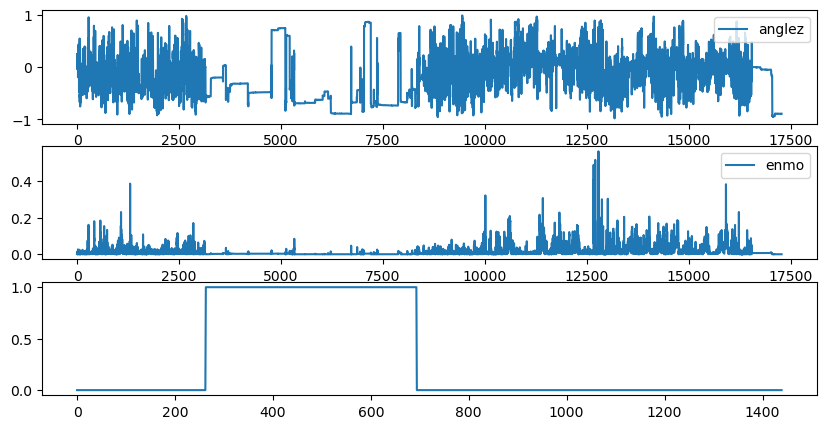

1


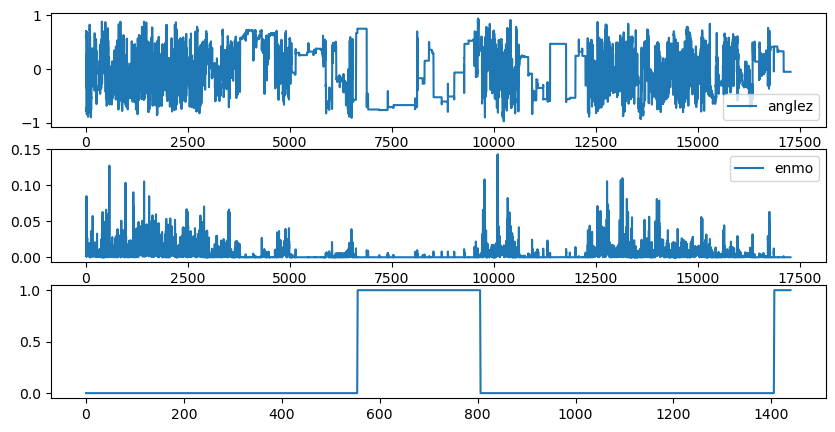

2
CPU times: user 28.3 s, sys: 1.98 s, total: 30.2 s
Wall time: 3.94 s


In [6]:
%%time

# dataset = DSSAddRolldiffDataset(key_df, series_df)
# dataset = DSSDataset(key_df, series_df)
# dataset = DSSMeanStdsDataset(key_df, series_df)
# dataset = DSSDownSampleDataset(key_df, series_df)
dataset = DSSTargetDownsampleDataset(key_df, series_df)
dataloader = DataLoader(dataset, batch_size=32, shuffle=True, num_workers=0)
print(len(dataset))
show_idx = 1
for idx, (input, target, input_info) in enumerate(dataloader):
    print(idx)
    # if idx < show_idx:
    #     continue
    if idx > show_idx:
        break
    plt.figure(figsize=(10, 5))
    plt.subplot(3, 1, 1)
    plt.plot(input[0, 0, :].numpy(), label="anglez")
    plt.legend()
    plt.subplot(3, 1, 2)
    plt.plot(input[0, 1, :].numpy(), label="enmo")
    plt.legend()
    plt.subplot(3, 1, 3)
    plt.plot(target[0, 0, :].numpy(), label="class_pred")
    plt.show()


In [7]:
for idx, (input, target, input_info) in enumerate(dataloader):
    if torch.isnan(input).any():
        print(idx)
        print(input)
        break
    elif torch.isnan(target).any():
        print(idx)
        print(target)
        break
    # print(input_info)
